**Jamboree Education - Case Study**

Jamboree has helped thousands of students to make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

**Column Profiling**:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)



**Problem Statement:** Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. We need to develop a model to predict the **Chance of Admit(Target)** with the help of the independent features.

In [1]:
#importing importtant linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")



In [2]:
# loading the dataframe
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# checking the null values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
#checking the datatypes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
#checking if any row have duplicates
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [6]:
# dropping the "Serial No" columns as it is unique identifiers for row, will cause confusion to the model
df.drop(columns= ["Serial No."], inplace=True)

In [7]:
# checkinng the shape of the dataframe
df.shape

(500, 8)

In [8]:
# covariance of two features
df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


Observation: 

Covariance does not give effective information about the relationship b/w two variables as it is not normalized. Therefore, Pearson corelation is the metric which we choose to determine relationship b/w two variables.

In [9]:
# Pearson corelation
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [10]:
# Statistical summary of features
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

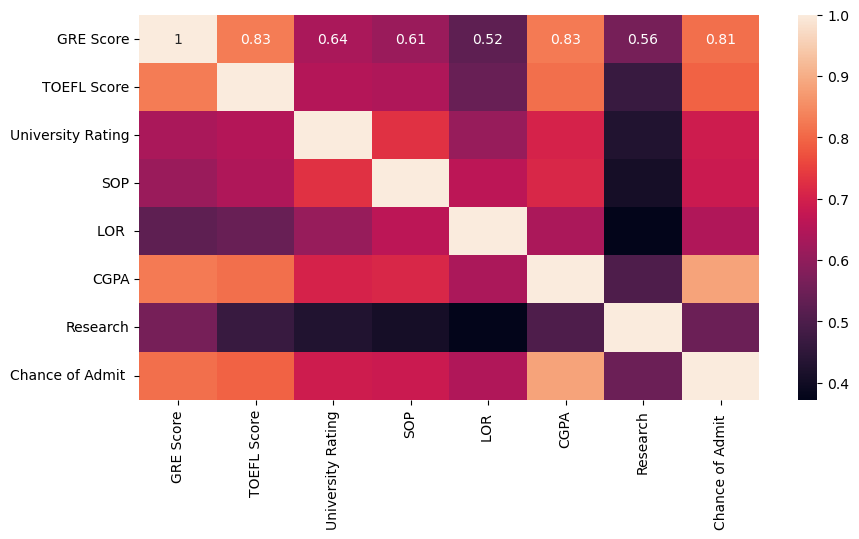

In [11]:
# corelation Heatmap for all the features
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, color="g")

observation: 

1. As we can see in the Heatmap that target feature has quite good corelation with GRE Score, TOEFL Score, CGPA.
2. Target feature has comparatively poor corelation with Research fetaure.

In [12]:
# getting the percentage of each unique values in all features
for i in df.columns:
    print(f"Total unique values in {i} column are :- {df[i].nunique()}")
    print(f"Value counts in {i} columns :- \n {df[i].value_counts(normalize=True)}")
    print()
    print("-"*120)

Total unique values in GRE Score column are :- 49
Value counts in GRE Score columns :- 
 GRE Score
312    0.048
324    0.046
316    0.036
321    0.034
322    0.034
327    0.034
311    0.032
320    0.032
314    0.032
317    0.030
325    0.030
315    0.026
308    0.026
323    0.026
326    0.024
319    0.024
313    0.024
304    0.024
300    0.024
318    0.024
305    0.022
301    0.022
310    0.022
307    0.020
329    0.020
299    0.020
298    0.020
331    0.018
340    0.018
328    0.018
309    0.018
334    0.016
332    0.016
330    0.016
306    0.014
302    0.014
297    0.012
296    0.010
295    0.010
336    0.010
303    0.010
338    0.008
335    0.008
333    0.008
339    0.006
337    0.004
290    0.004
294    0.004
293    0.002
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------
Total unique values in TOEFL Score column are :- 29
Value counts in TOEFL Score columns :- 
 TOEFL Score
110 

In [13]:
# Getting the range of values in all features
for i in df.columns:
    print(f"Range of {i} column is from {df[i].min()} to {df[i].max()}")

    print("-"*120)

Range of GRE Score column is from 290 to 340
------------------------------------------------------------------------------------------------------------------------
Range of TOEFL Score column is from 92 to 120
------------------------------------------------------------------------------------------------------------------------
Range of University Rating column is from 1 to 5
------------------------------------------------------------------------------------------------------------------------
Range of SOP column is from 1.0 to 5.0
------------------------------------------------------------------------------------------------------------------------
Range of LOR  column is from 1.0 to 5.0
------------------------------------------------------------------------------------------------------------------------
Range of CGPA column is from 6.8 to 9.92
------------------------------------------------------------------------------------------------------------------------
Range of Resea

**1. Univariate Graphical Analysis**

In [14]:
# list of all features in the dataframe
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

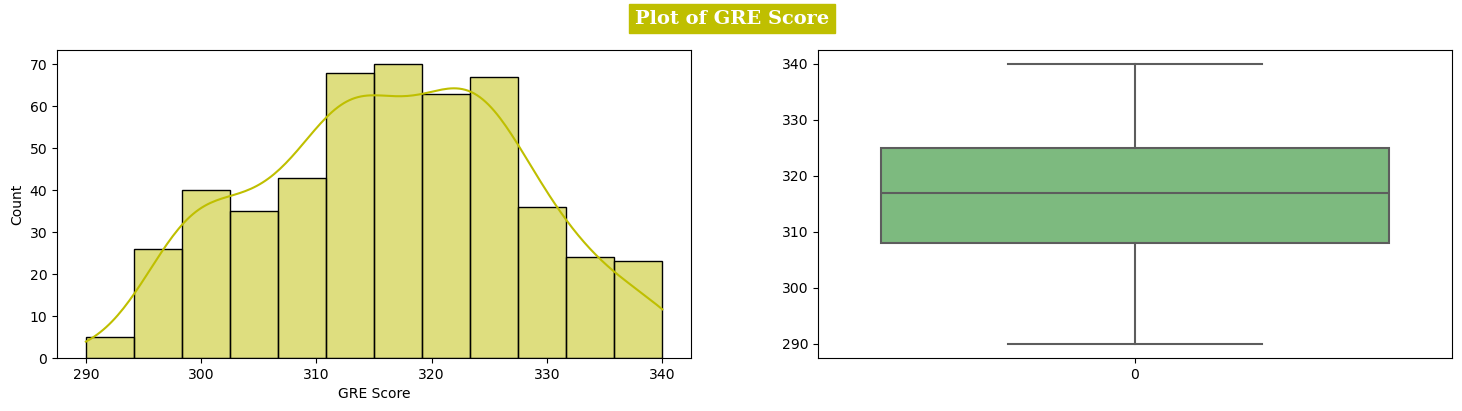

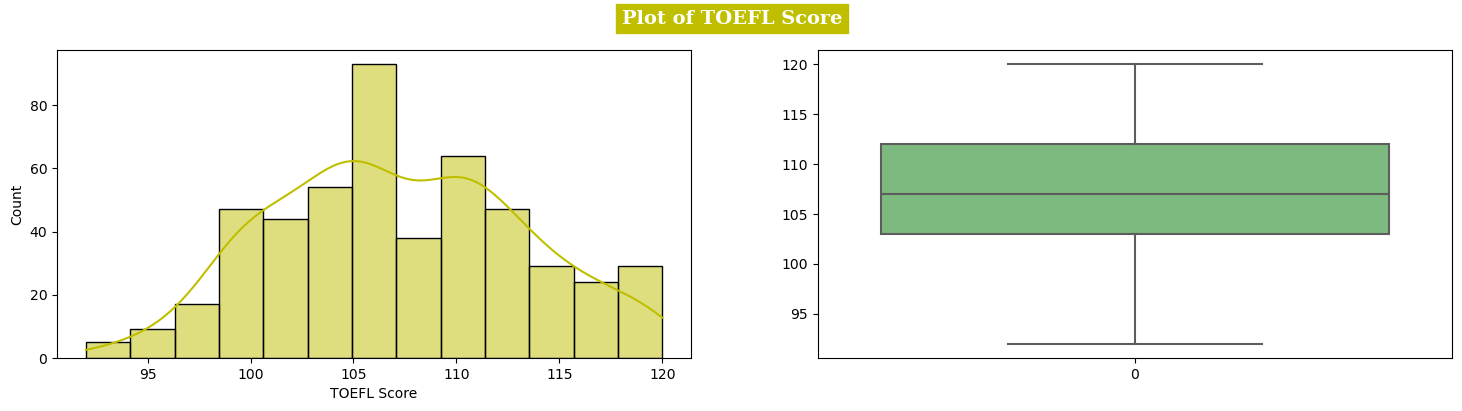

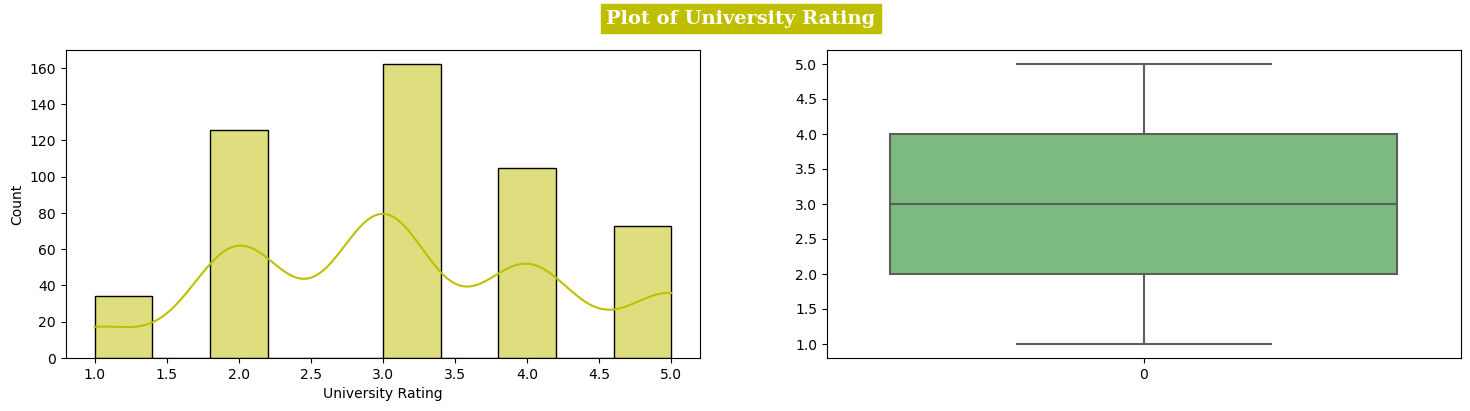

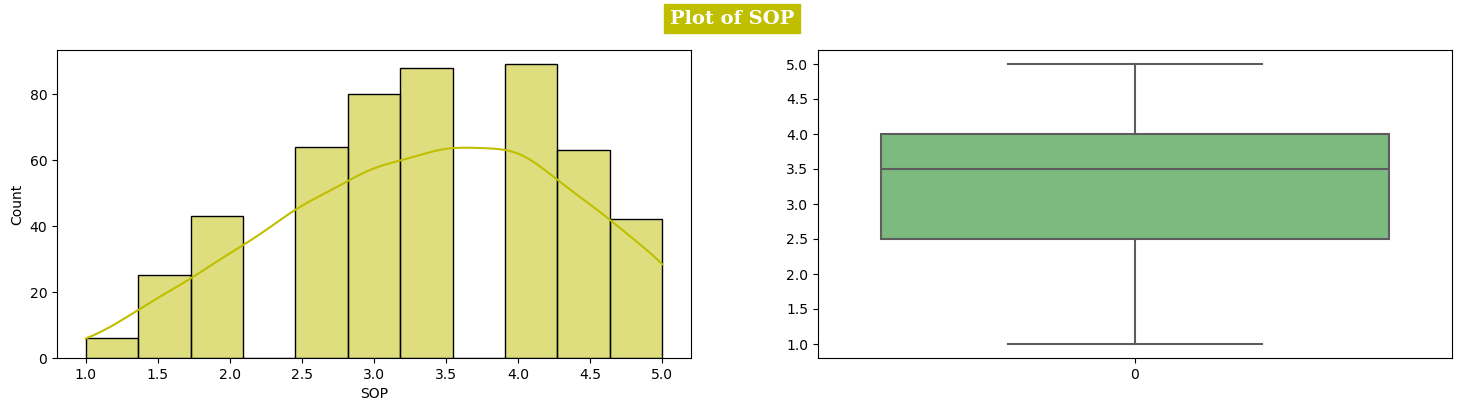

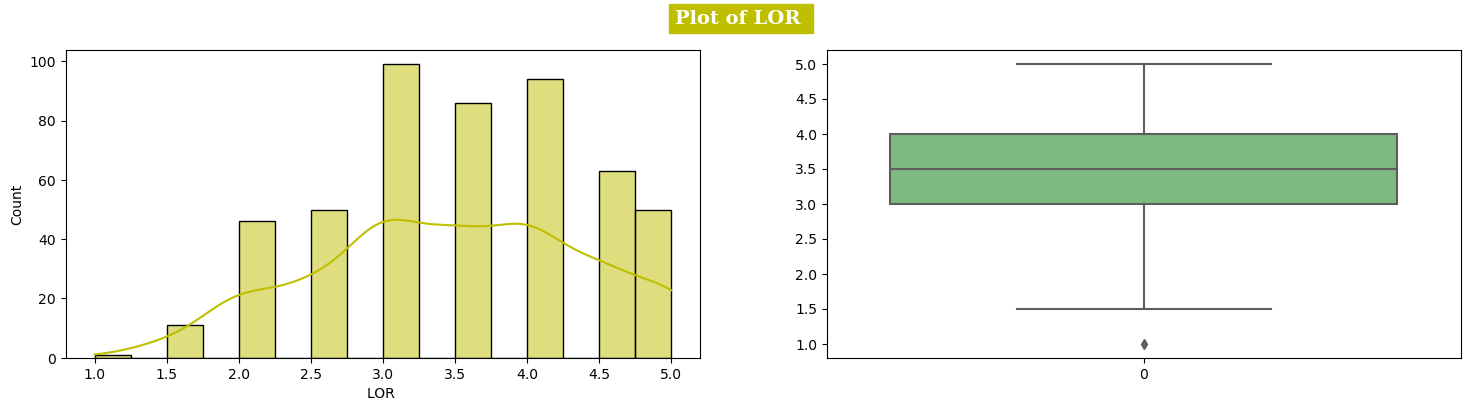

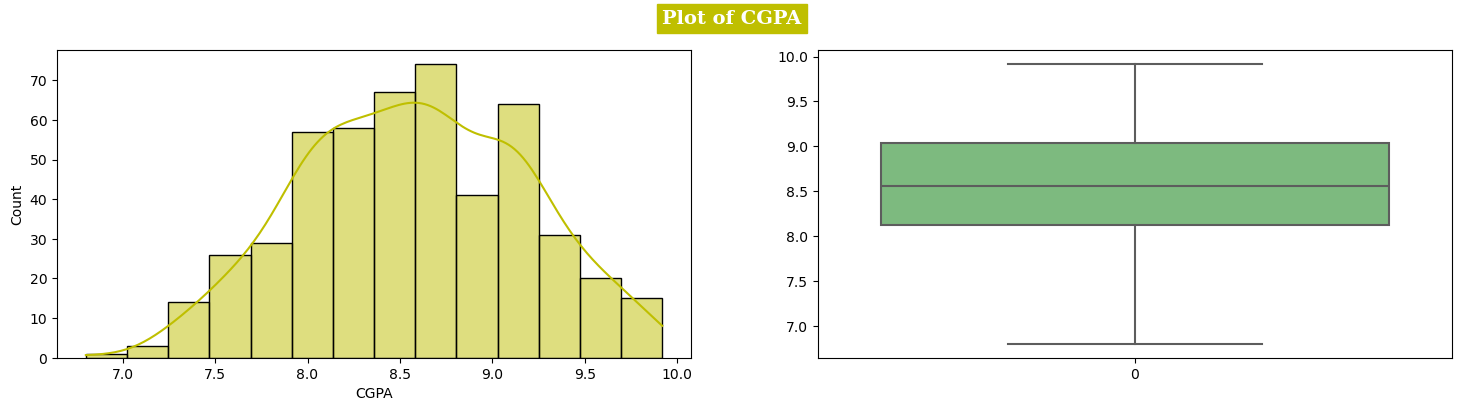

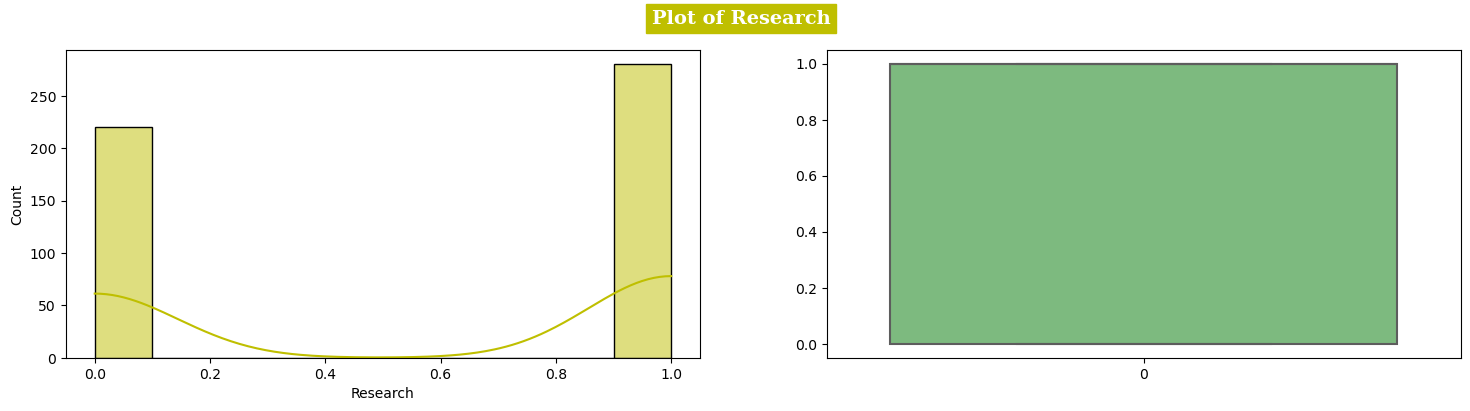

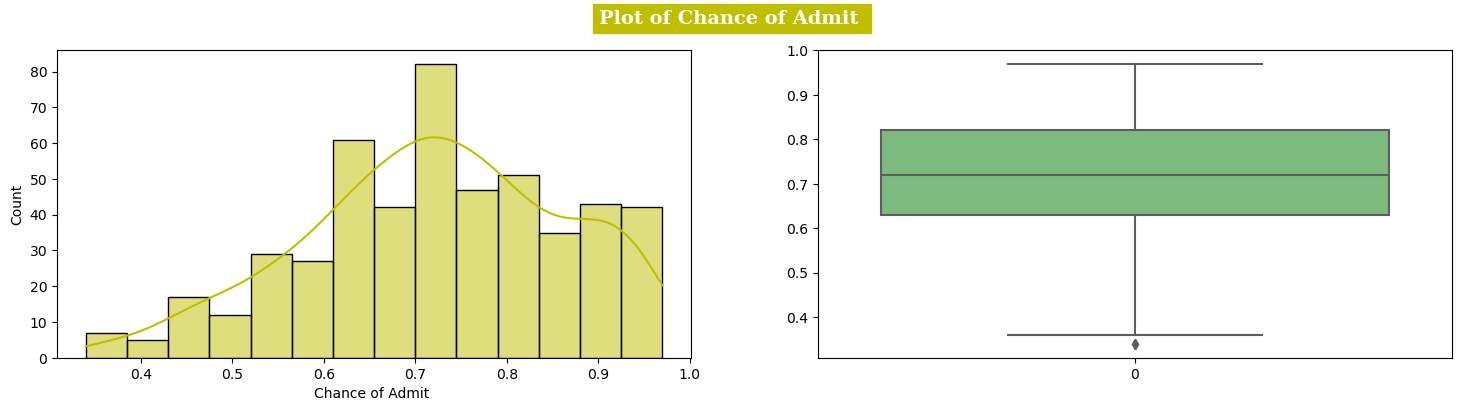

In [15]:
# showing left hand side - histogram and right hand side - boxplot for all features
for i in df.columns:
    plt.figure(figsize=(18,4))
    plt.subplot(122)
    sns.boxplot(df[i], palette = "Greens")
    plt.subplot(121)
    sns.histplot(df[i], kde=True, color = "y")
    plt.suptitle(f"Plot of {i}", fontsize=14, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
    plt.show() 

In [16]:
# making the copy of dataframe in the new one so that original dataframe keep its values
df1=df.copy() # deep copy


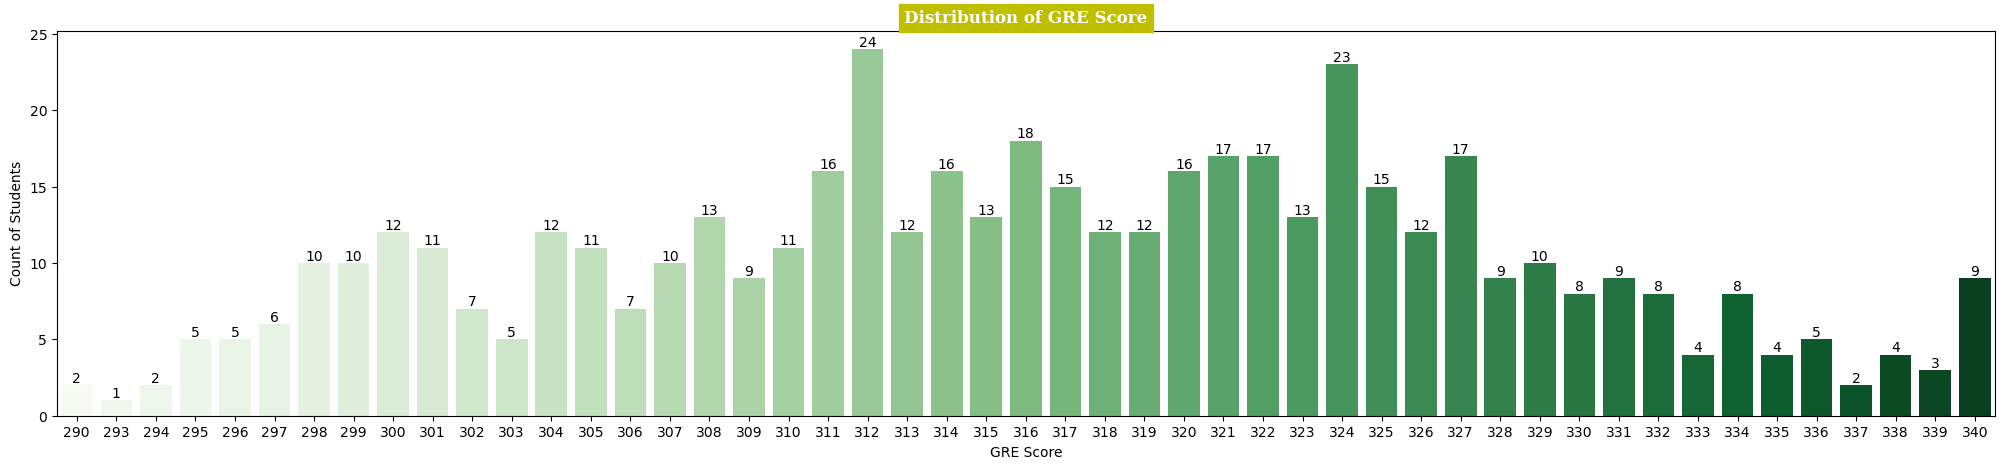

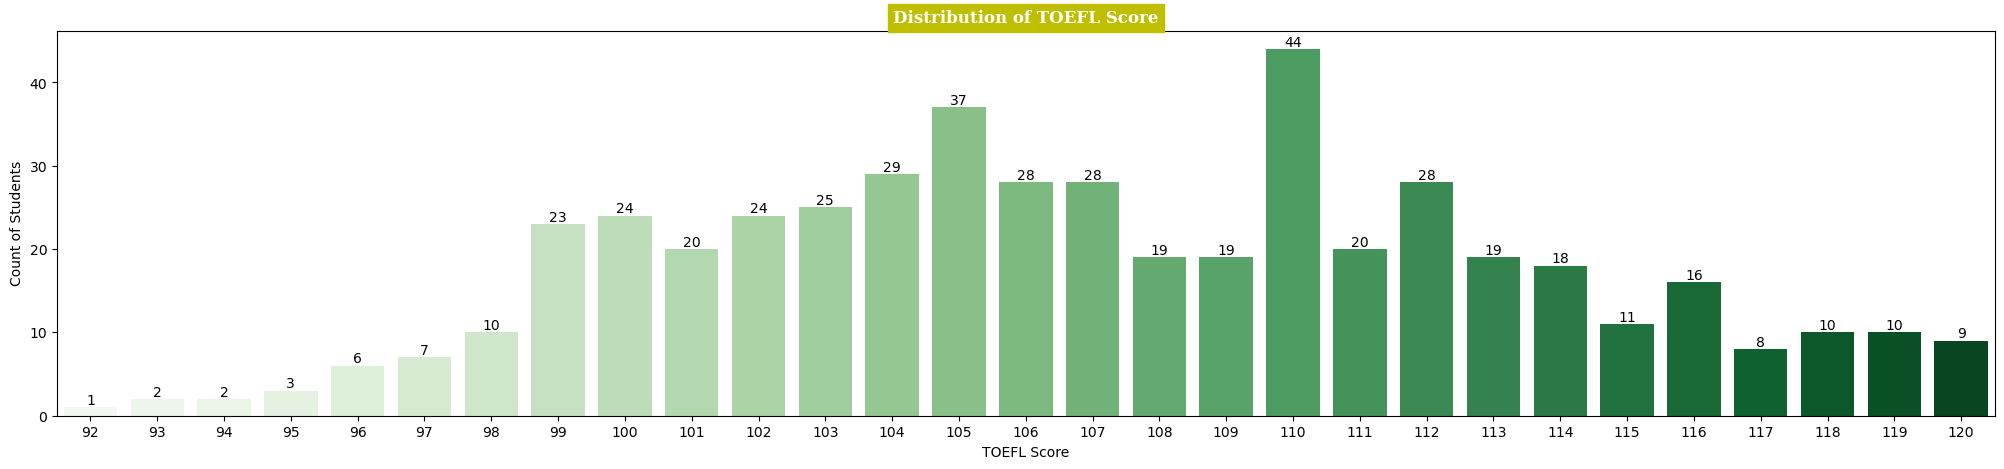

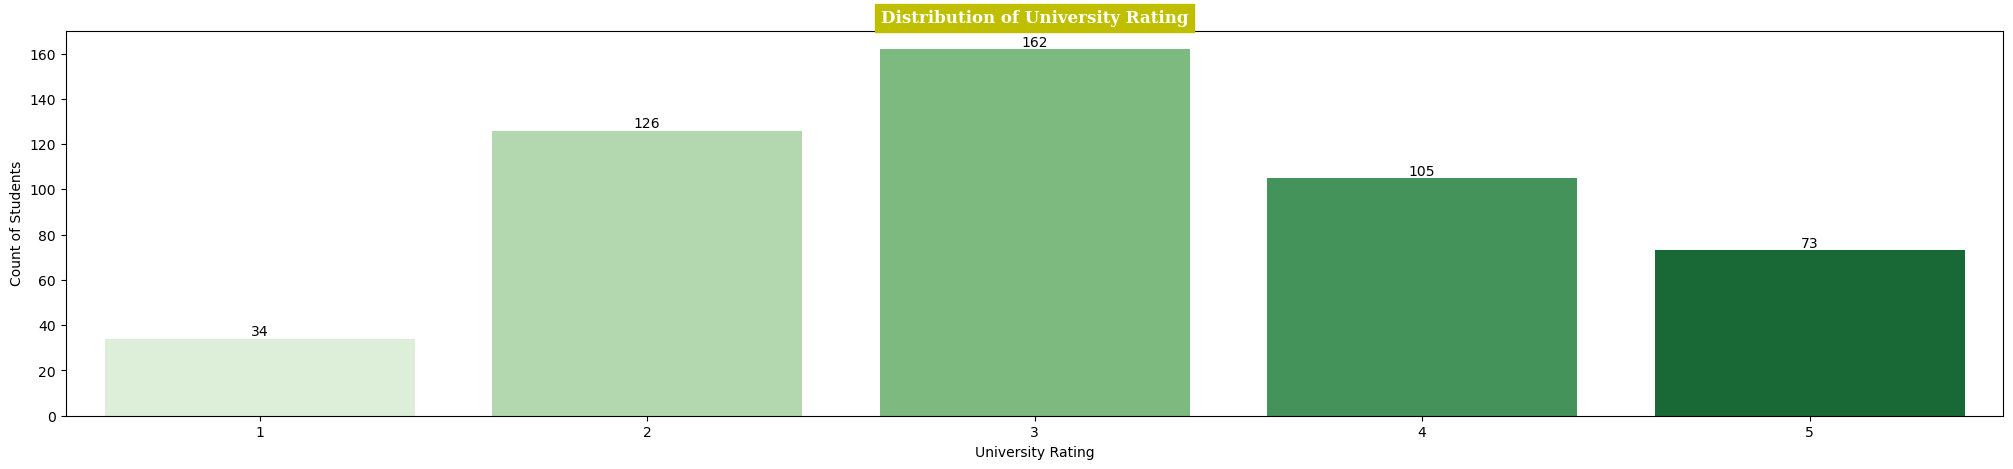

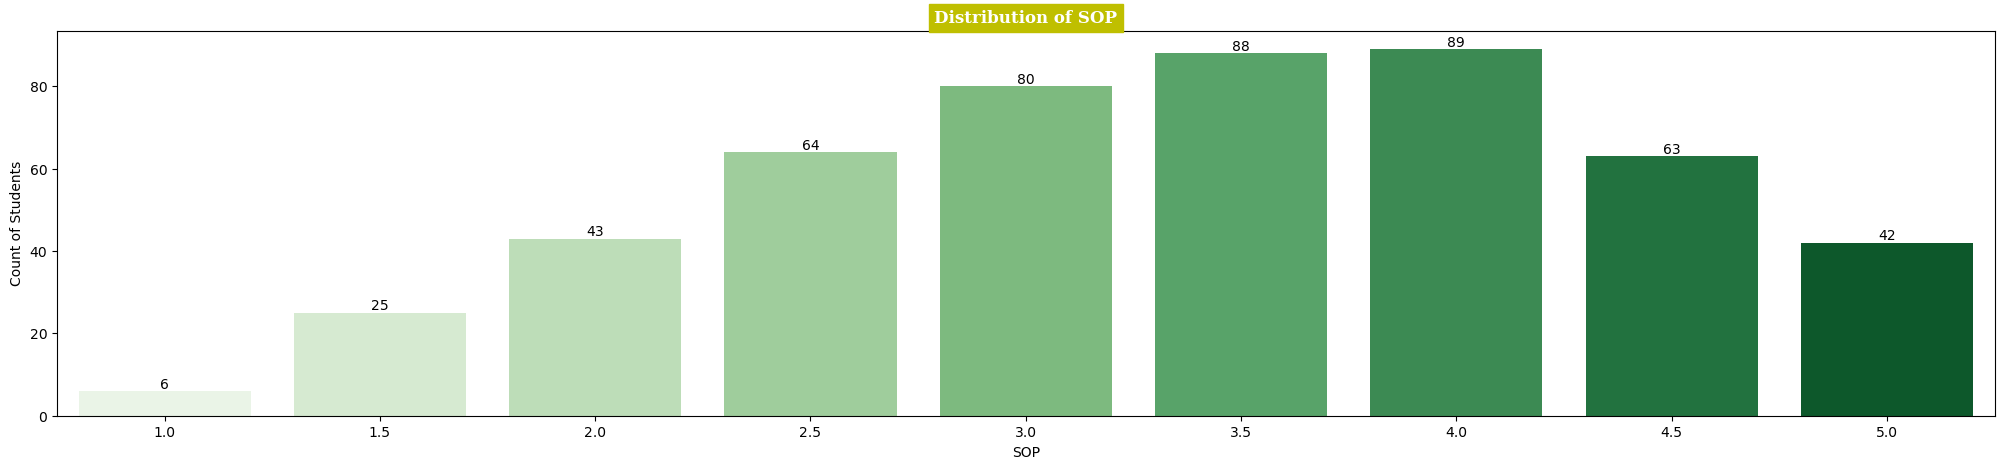

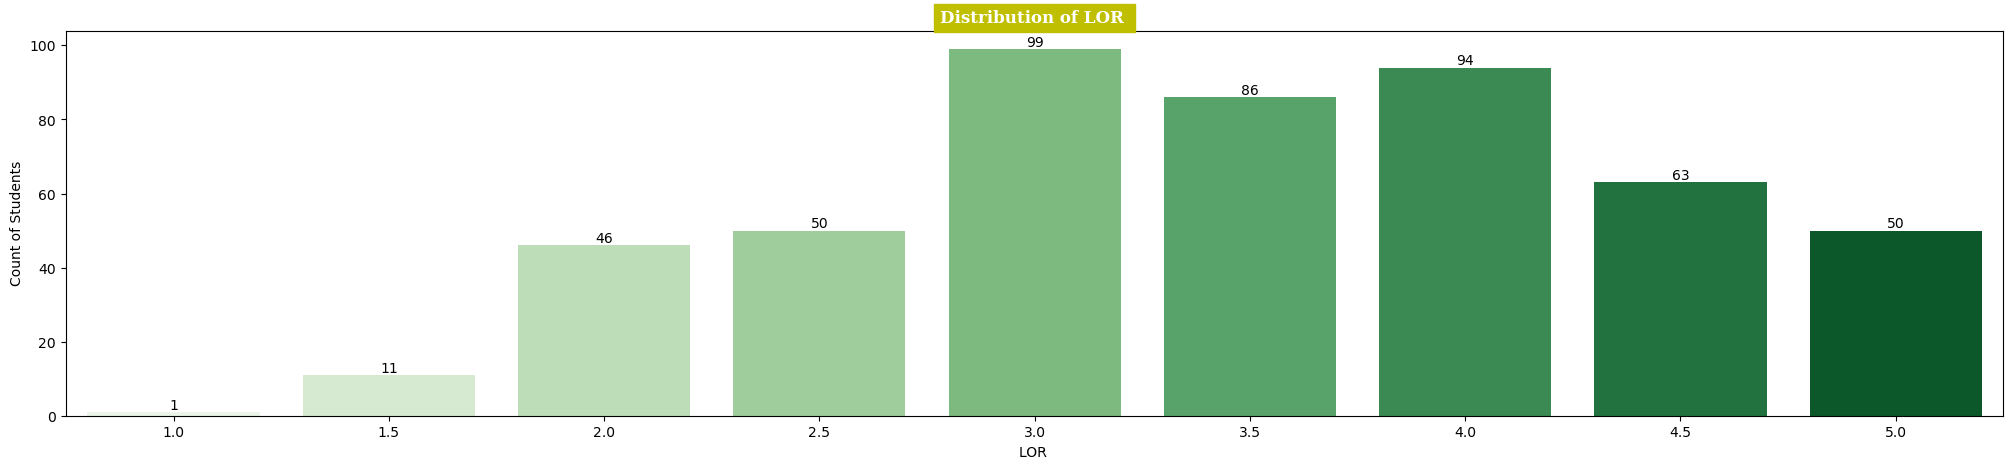

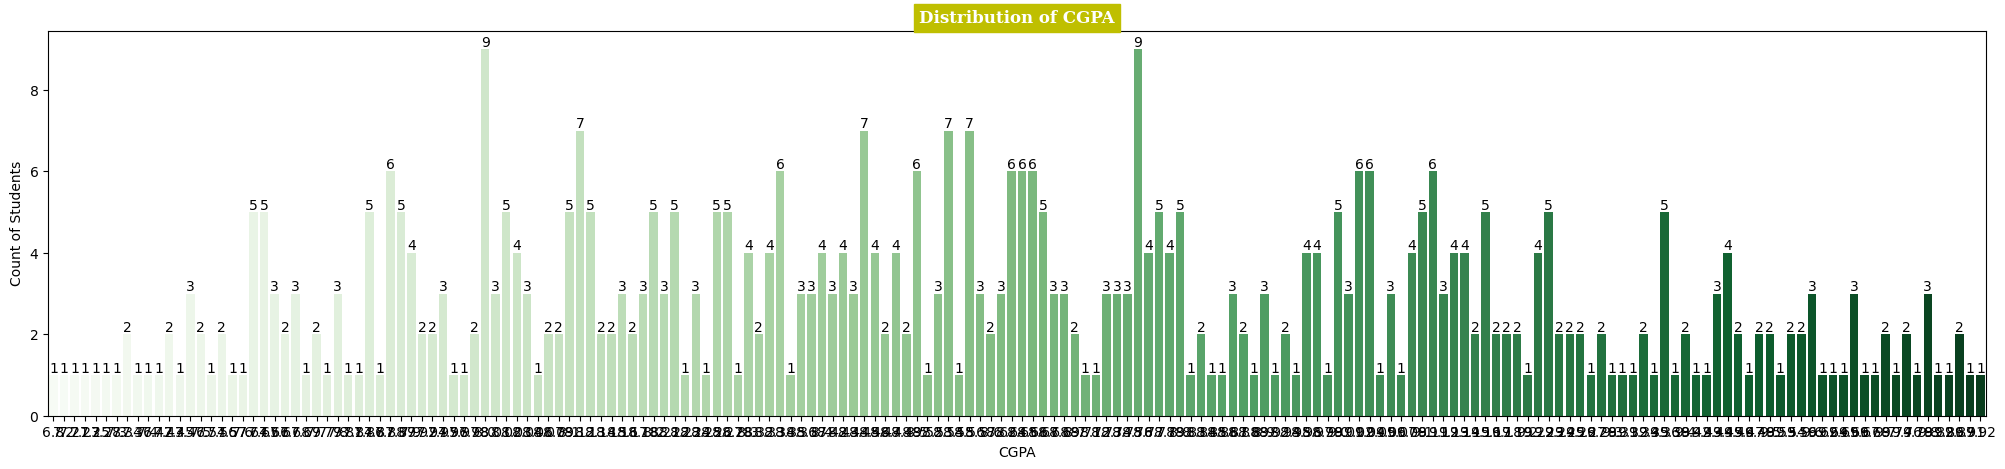

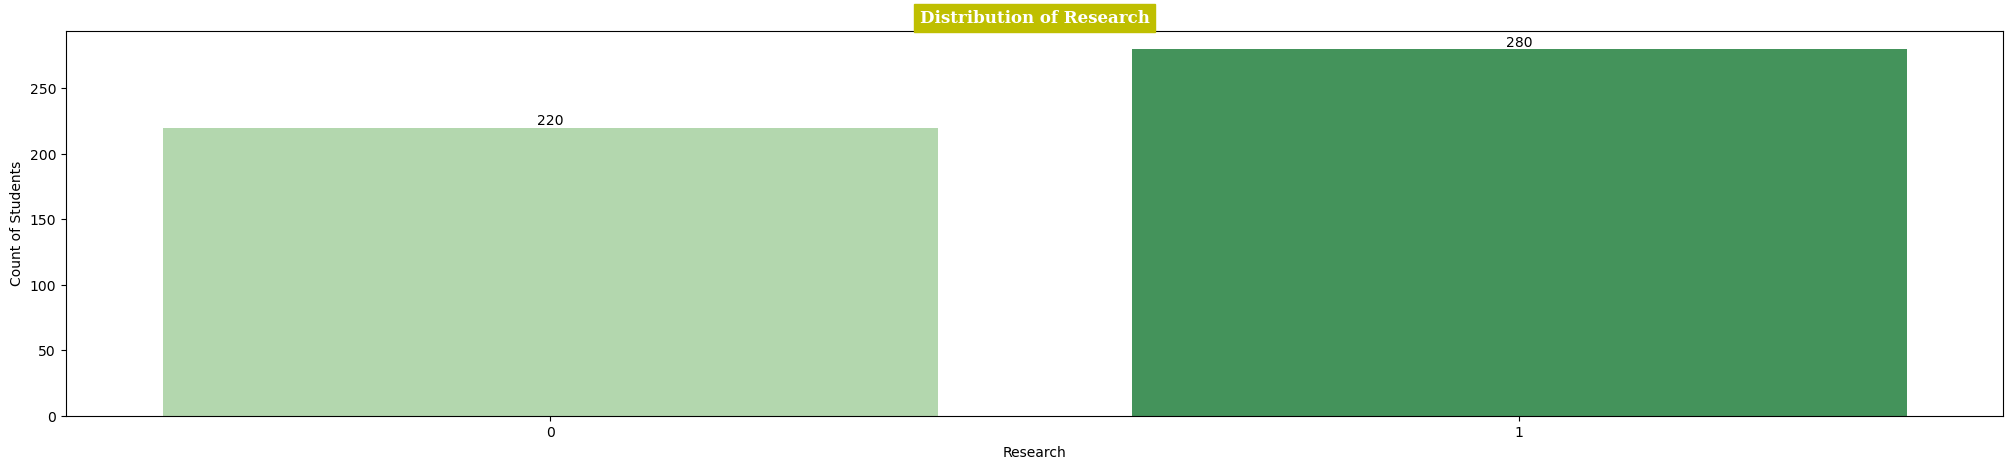

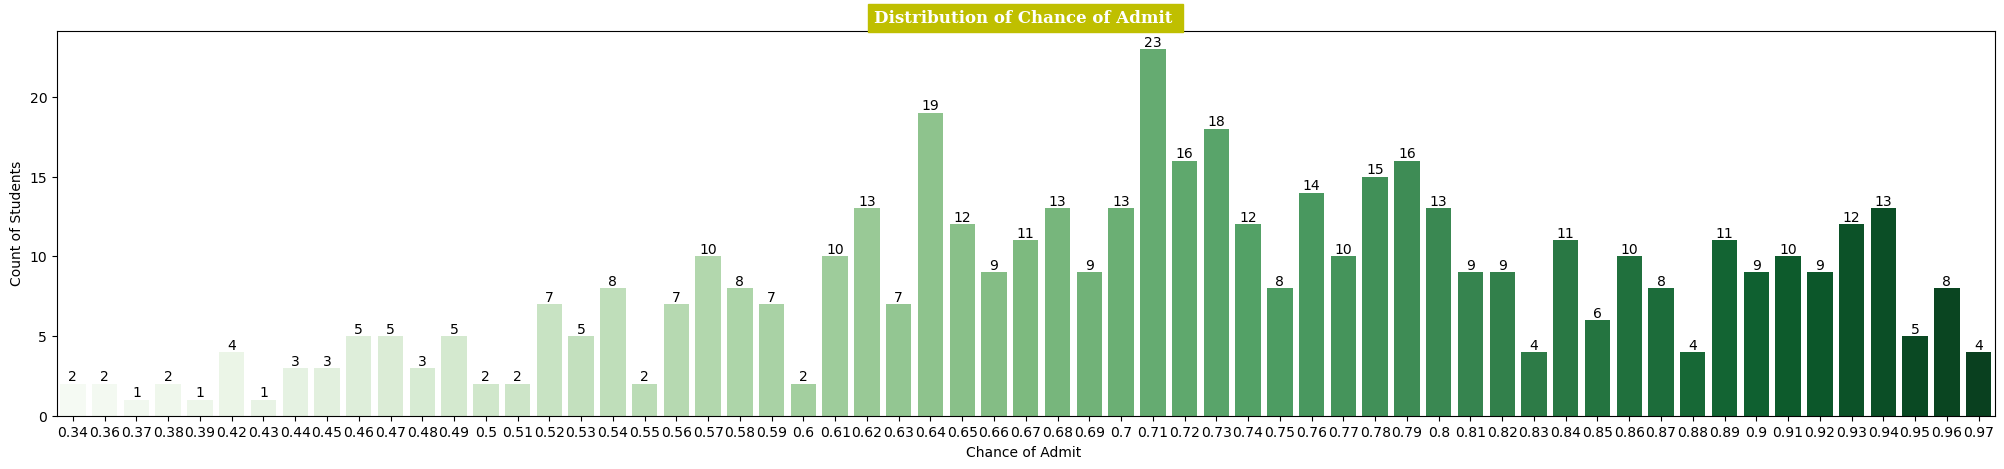

In [17]:
# showing countplot for all the features
for i in df1.columns:
    plt.figure(figsize=(25,5))
    b = sns.countplot(x = df[i], palette = "Greens")
    plt.title(f"Distribution of {i}", fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
    b.bar_label(b.containers[0], label_type="edge", fmt="%d")
    plt.xlabel(i)
    plt.ylabel("Count of Students")
    plt.show()
    

In [18]:
# showing the list of all features in the dataframe
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
# renaming the target variable
df1.rename({"Chance of Admit ": "Chance_of_Admit"}, axis=1, inplace=True)

In [20]:
# list of all features with the renamed target variable
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

**2. Bivariate Graphical Analysis**



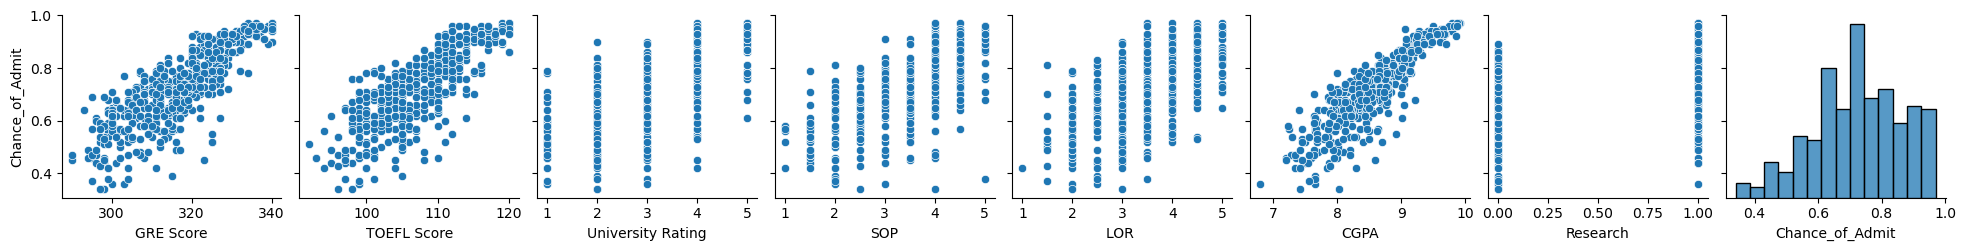

In [21]:
# pairplot
sns.pairplot(data=df1, y_vars = "Chance_of_Admit")
plt.show()

Insights:

1. Features - [GRE_Score, TOEFL Score, CGPA] are highly positively corelated with chance of admit.
2. While [University rating, SOP, LOR] have also a little related with chance of admit as, as the chance of admit increases - these features also increases at some extent.
3. Research feature is the only feature which does not have an impact on the chance of admit.
4. Also, we can see from the scatterplot that these features - [University rating, SOP, LOR] are not continious variable.

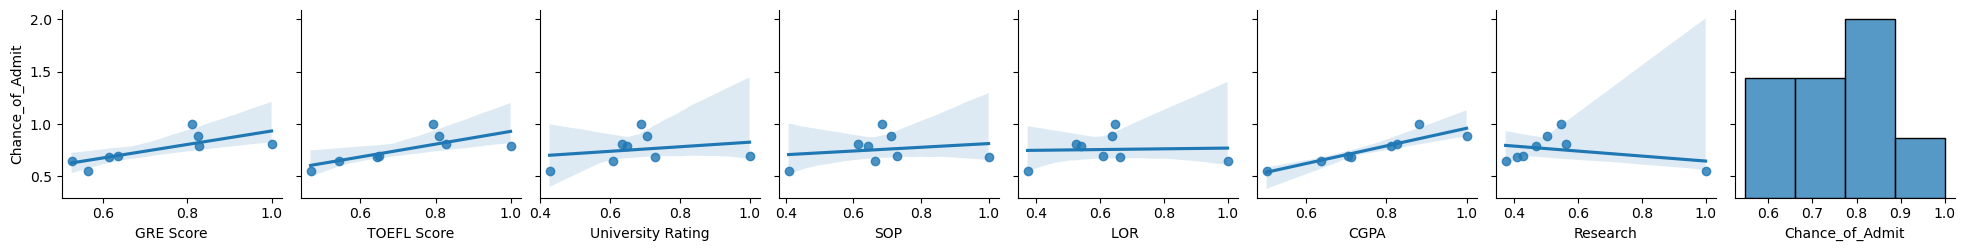

In [22]:
# pairplot with kind = regression
sns.pairplot(df1.corr(), y_vars="Chance_of_Admit", kind = "reg")

In [23]:
# list of all features except target variable
df1.columns[:-1]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

GRE Score


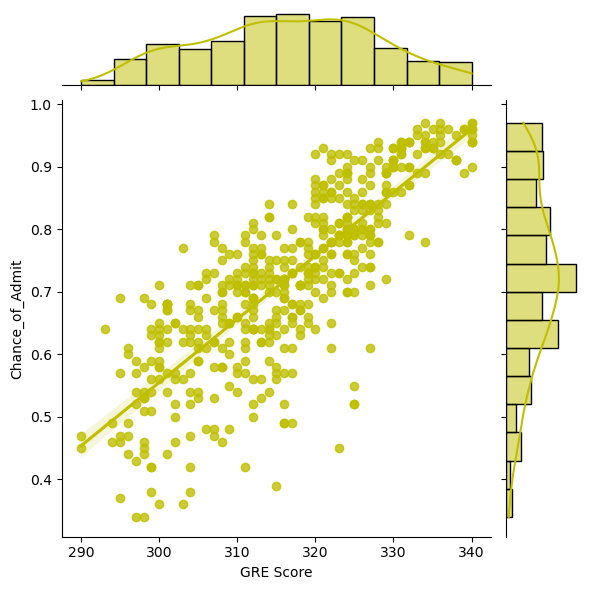

TOEFL Score


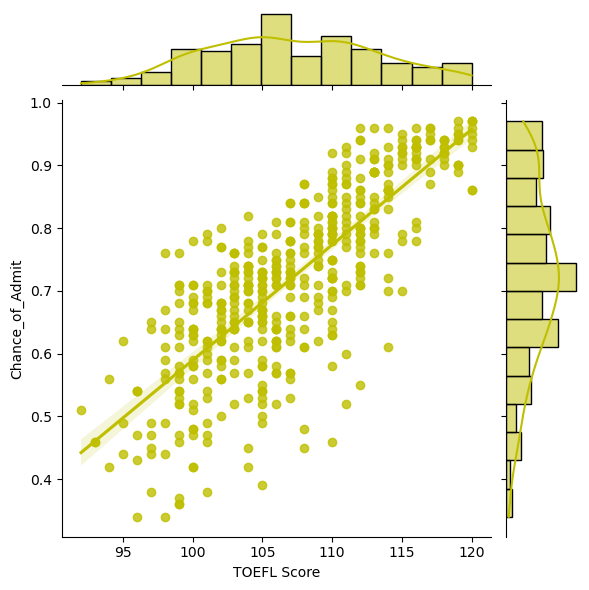

University Rating


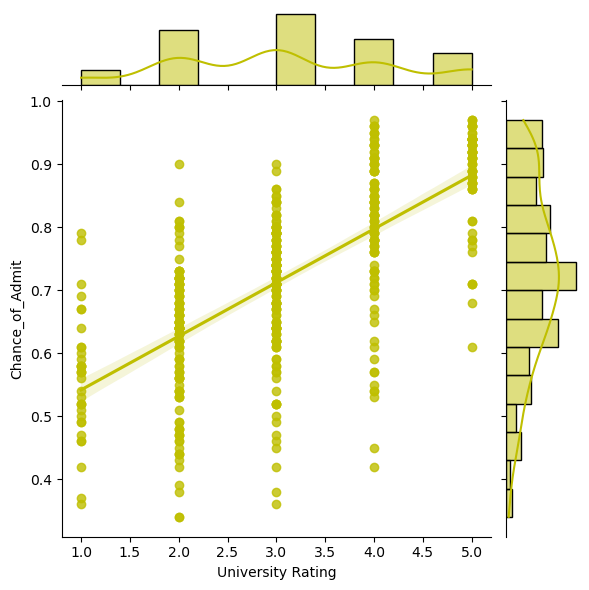

SOP


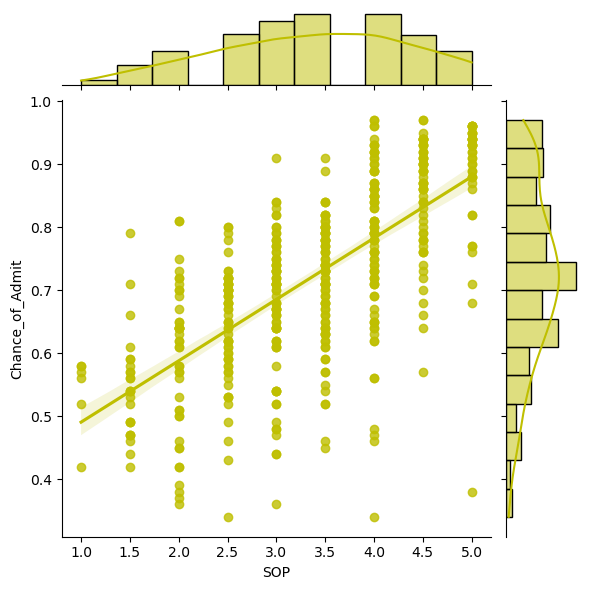

LOR 


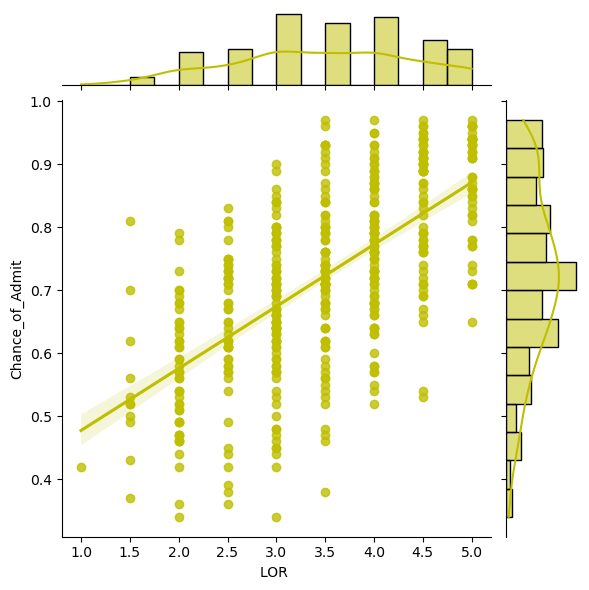

CGPA


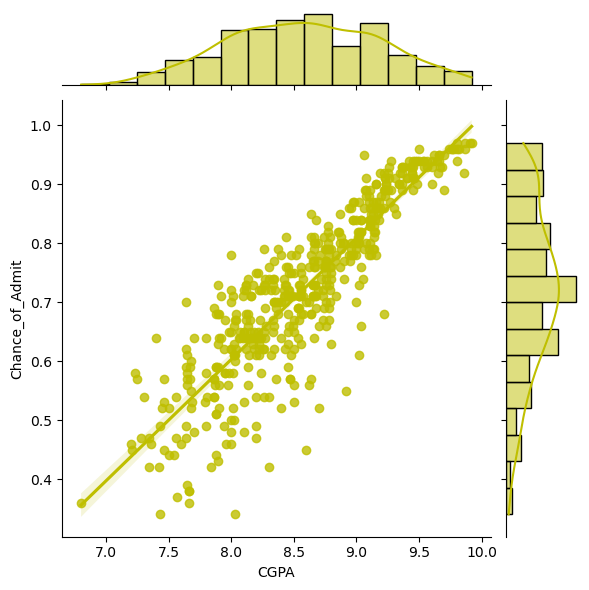

Research


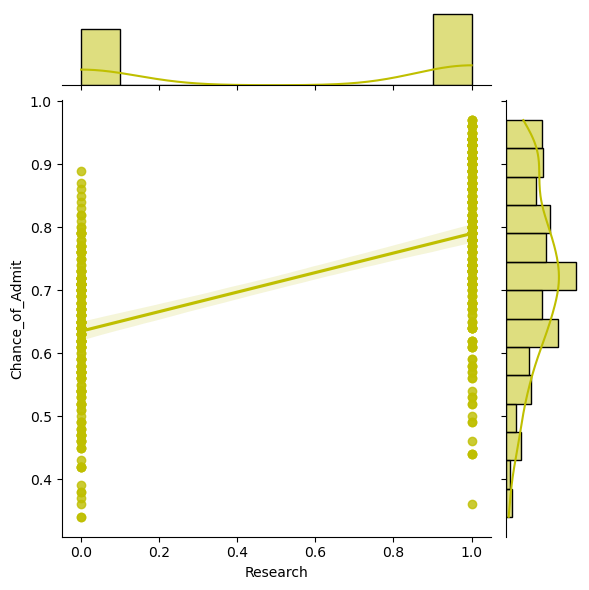

In [24]:
# jointplot for all the features
for col in df1.columns[:-1]:
    print(col)
    sns.jointplot(data=df1, x=df1[col], y=df1["Chance_of_Admit"], kind="reg", color="y")
    #plt.title("Chance of Admit vs", col)
    plt.show()


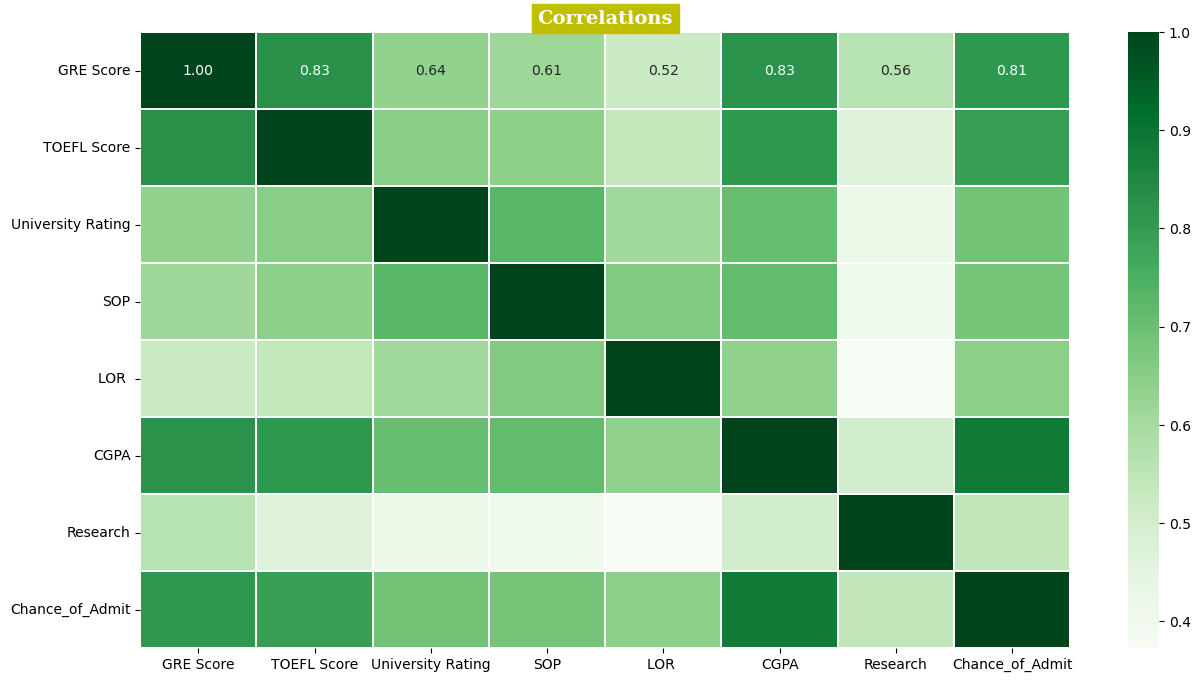

In [25]:
# Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap="Greens", linewidths=0.1, fmt=".2f", annot_kws={"size": 10})
plt.title(f"Correlations", fontsize=14, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
plt.show()

In [26]:
# Storing the target feature and other independent features seeprately
X = df1.drop(columns = ["Chance_of_Admit"])
y = df1["Chance_of_Admit"] 

**3. Train Test Split**

In [27]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

**4. Data Preprocessing - Standardization**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 

In [29]:
X_train = scaler.fit_transform(X_train) # This gives the Xtrain in numpy.array datatype 

In [30]:
X_test = scaler.transform(X_test)  # This gives the Xtest in numpy.array datatype 

In [31]:
#numpy array to dataframe
X_train = pd.DataFrame(X_train, columns = df1.columns[:-1])
X_test = pd.DataFrame(X_test, columns = df1.columns[:-1])

In [32]:
# shape of train and test data
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [33]:
# shape of train target and test target feature
y_train.shape, y_test.shape

((400,), (100,))

**5. Linear Regression Model**

In [34]:
# importing LinearRgression from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [35]:
# fitting the model for training
model.fit(X_train,y_train)

LinearRegression()

In [36]:
y_ptrain = model.predict(X_train) # predicting target for train(seen) data
y_ptest = model.predict(X_test)   # predicting target for test(unseen) data

In [37]:
model.score(X_train, y_train) # r2-score for train data

0.8210671369321554

In [38]:
model.score(X_test,y_test) # r2-score for test data

0.8188432567829628

In [39]:
# importing metrics from sklearn such as r2-score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_train, y_ptrain)



0.8210671369321554

In [40]:
# r2-score from the sklearn library
r2_score(y_test, y_ptest)

0.8188432567829628

Weight coefficients of the model

In [41]:
# length of weight coefficients
len(model.coef_)

7

In [42]:
# showing the weight coeficients and intercept coefficient in dataframe
coef = pd.DataFrame(model.coef_.reshape(1,-1), columns = df1.columns[:-1])
coef["intercept"] = model.intercept_
coef

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.026671,0.018226,0.00294,0.001788,0.015866,0.067581,0.01194,0.724175


In [43]:
# defined a function to MSE, MAE and RMSE from the sklearn library
def model_evaluation(y_actual, y_forecast, model1):
    n = len(y_actual)
    if len(model1.coef_.shape) ==1: # check if the array is 1D
        p = len(model1.coef_)       # assigning the variable p to length of model's coeficient 
    else:
        p = (model.coef_[1])       # assigning the variable p to length of model's coeficient  
    MSE = np.round(mean_squared_error(y_actual, y_forecast, squared=True),2)   # calculating MSE
    MAE = np.round(mean_absolute_error(y_actual, y_forecast),2)                # calculating MAE
    RMSE = np.round(mean_squared_error(y_actual, y_forecast, squared=False),2) # calculating RMSE
    r2 = np.round(r2_score(y_actual, y_forecast),2)                            # calculating r2-score
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)                            # calculating adjusted r2-score
    return print(f"MSE:{MSE}\nMAE:{MAE}\nRMSE:{RMSE}\nR2 Score:{r2}\nAdjusted Score:{adj_r2}") 
    

In [44]:
# MAE, MSE, RMSE for training data from model_evaluation function and LinearRegression's model
model_evaluation(y_train, y_ptrain, model)

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.82


In [45]:
# checking the type of predicted train data variable
type(y_ptrain)

numpy.ndarray

In [46]:
# MAE, MSE, RMSE for testing data from model_evaluation function and LinearRegression's model
model_evaluation(y_test, y_ptest, model)

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.81


In [47]:
# checking the type of train data's target variable
type(y_train)

pandas.core.series.Series

**6. Modelling Linear Regression using OLS(Ordinary Least Squares)**

In [48]:
# reshaping the training target feature
y_train = y_train.values.reshape(-1,1)

In [49]:
import statsmodels.api as sm            # importing the statsmodel.pi as sm
X_train_sm = sm.add_constant(X_train)   # Adding the constant feature in the training data as OLS model only estimates features' parameter
model1 = sm.OLS(y_train, X_train_sm)    # constructing the OLS regression model
results = model1.fit()                  # fitting the OLS model


In [50]:
type(X_train_sm) # checking the type of training data from OLS model

pandas.core.frame.DataFrame

In [51]:
y_ptrain_sm = results.predict(X_train_sm) # predicting the target feature for training data

In [52]:
train_r2 = r2_score(y_train, y_ptrain_sm) # r2 score on training data
train_r2

0.8210671369321554

In [53]:
X_test_sm = sm.add_constant(X_test)     # Adding a constant to the test set as well (to match the training set structure)
y_ptest_sm = results.predict(X_test_sm) # predicting the target feature for testing data
test_r2 = r2_score(y_test, y_ptest_sm)  # r2 score on training data
test_r2

0.8188432567829625

In [54]:
print(results.summary()) # printing detailed summary of OLS model's statistics

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          3.41e-142
Time:                        15:17:28   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

Observations: 

1. p-value: This is the probability of obtaining a coefficient as extreme as the one observed if the null hypothesis were true (that is, if the feature has no impact on the target variable).
2. Low p-value (typically ≤ 0.05): Indicates that there is strong evidence against the null hypothesis, suggesting that the feature is statistically significant and likely has an impact on the target variable.
3. High p-value (typically > 0.05): Suggests that there is weak evidence against the null hypothesis, implying that the feature may not be statistically significant.

4. We can clealy see, features - ["University Rating", "SOP"] have p-value > 0.05, that implies these features have no role in predicting the target.


**7. Checking Assumptions of Linear Regression**

**a. Assumption of Linearity**

In [55]:
# reshaping the actuat target variable
y_actual = y_train.flatten() 


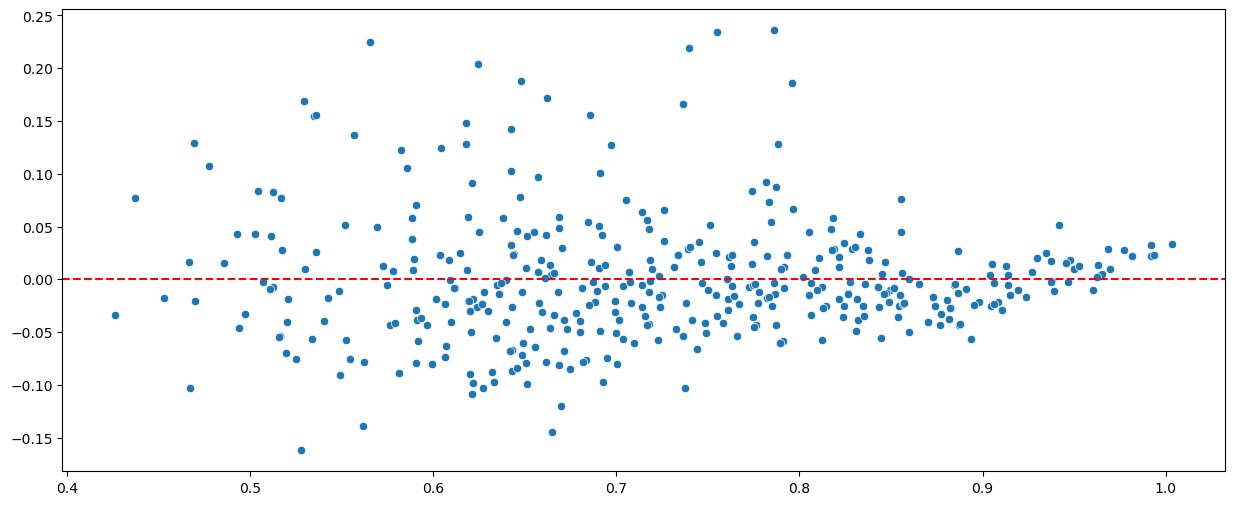

In [56]:
residuals = y_ptrain - y_actual             # calculating the residuals
plt.figure(figsize=(15,6))                  # setting the dimensions of figure
sns.scatterplot(x=y_ptrain, y=residuals)    # plotting the scatter plot
plt.axhline(y=0, color='r', linestyle='--') # drawing a line at y=0
plt.show()

<Figure size 1500x600 with 0 Axes>

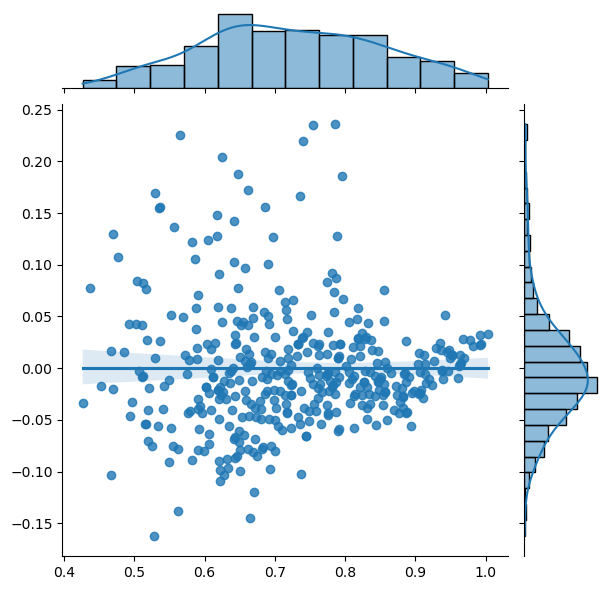

In [57]:
residuals = y_ptrain - y_actual
plt.figure(figsize=(15,6))
sns.jointplot(x = y_ptrain, y=residuals, kind="reg")
#plt.axhline(0, color='r', linestyle='--')
#plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Observation:

As we can see in the residual plot, Assumption of Linearity is not violated.


**b. No Multicollinearity**

In [58]:
# importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()                                     # creating a dataframe
X_t = pd.DataFrame(X_train, columns = X_train.columns)   
vif["features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [60]:
vif

,features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


Insights: 

1. VIF value lower than 5 wont show any multicollinearity, In the given dataframe - no features' VIF value go beyond 5. Therefore there is no multicollinearity in the given dataset

**c. Normality of Residuals**

   To check the Normality of residuals, we can follow these methods:
   1. Residual Histogram
   2. Q-Q Plot
   3. Shapiro Wilk test
   

In [61]:
r_train = y_train.flatten() - y_ptrain 
r_train

array([-2.31967833e-02, -3.50785756e-02, -2.40153226e-02,  4.72522217e-02,
        9.90540506e-02,  9.08373061e-02, -6.58161314e-02,  1.48210573e-02,
        9.69686809e-02,  2.18822145e-02,  6.07573238e-02, -1.28949685e-02,
       -1.65367551e-02, -2.86301055e-02, -1.64144921e-02, -2.14965768e-02,
        3.85314611e-02, -2.63589301e-02, -4.25604733e-02, -1.55745390e-01,
        4.23678203e-02,  1.32253052e-02,  2.63664219e-02,  4.14109412e-02,
        4.87719781e-02, -5.06992699e-02, -4.91487022e-02, -2.21179347e-02,
        7.13546049e-03, -8.25524673e-02,  1.48960831e-02, -3.07642648e-03,
        2.66771709e-02,  1.91491666e-02,  1.32148523e-02, -4.26811981e-02,
        3.60518934e-02,  9.74293328e-03, -1.36199209e-02,  3.18181001e-02,
       -1.85999563e-01,  2.08671586e-02, -2.89496722e-02, -1.69165425e-01,
       -1.79119156e-02,  6.46217905e-02, -1.31871552e-02, -2.23464619e-02,
        6.69811060e-02, -9.35477990e-03,  2.58076628e-02, -9.73066560e-02,
        4.91242084e-02, -

In [62]:
type(y_train.flatten()) # checking the type of training target varaiable

numpy.ndarray

In [63]:
type(y_ptrain)      # checking the type of predicted training target varaiable

numpy.ndarray

In [64]:
r_test = y_test - y_ptest  # residuals for testing data
r_test

361    0.015425
73     0.044819
374   -0.182660
155    0.062630
104   -0.075883
         ...   
347   -0.015631
86     0.033357
75    -0.065988
438   -0.064694
15    -0.108657
Name: Chance_of_Admit, Length: 100, dtype: float64

In [65]:
type(y_test)

pandas.core.series.Series

In [66]:
type(y_ptest)

numpy.ndarray

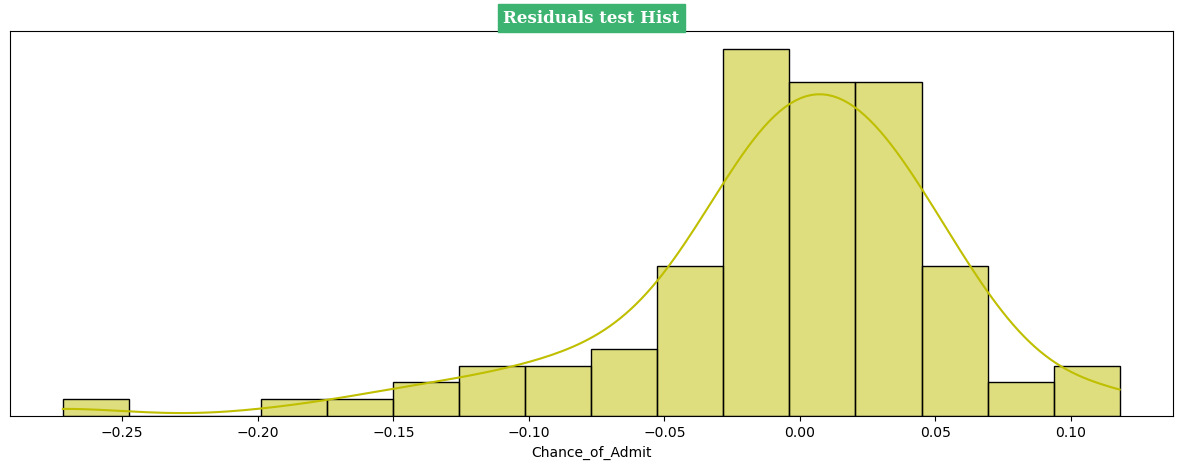

In [67]:
plt.figure(figsize=(15,5))                  # setting the dimension of figure
sns.histplot(r_test, kde=True, color="y")   # plotting the testing residuals
plt.title('Residuals test Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
#sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

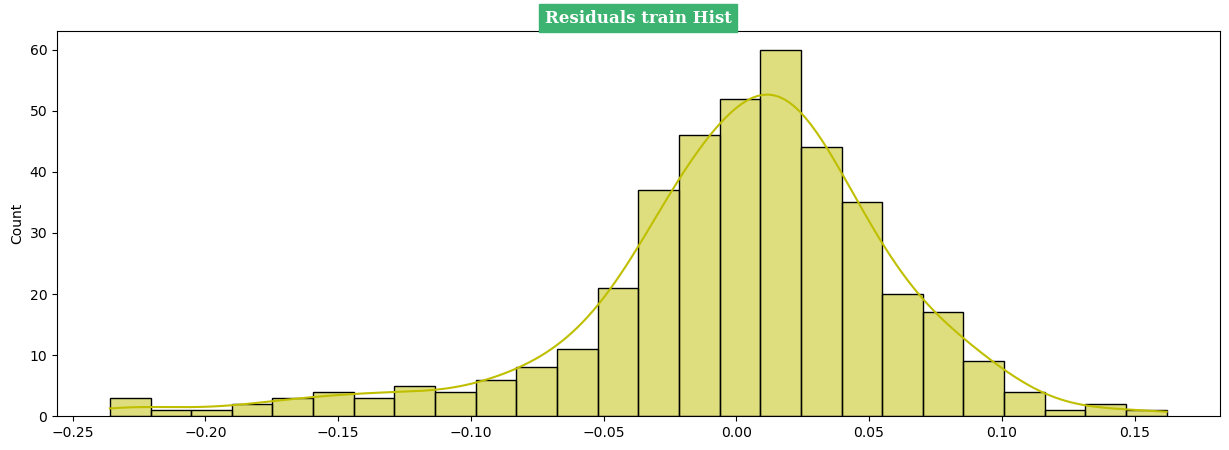

In [68]:
plt.figure(figsize=(15,5))                         # setting the dimension of figure
sns.histplot(r_train, kde=True, color="y")         # plotting the training residuals
plt.title('Residuals train Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
#sns.despine(left=True)
#plt.ylabel("")

plt.show()

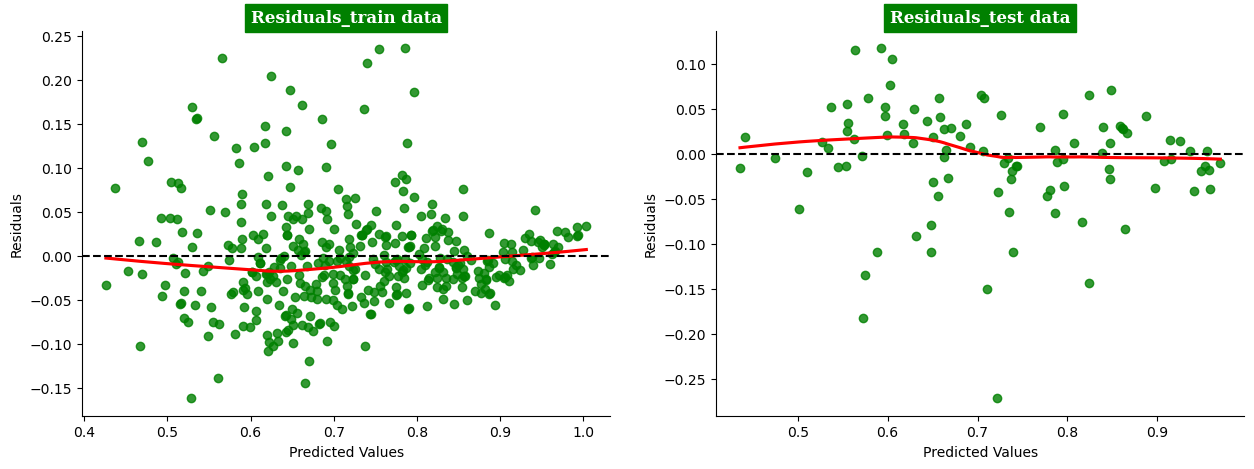

In [69]:
#residuals vs train data plot
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_ptrain, y=residuals, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# residuals vs test data plot
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_ptest, y=r_test, lowess=True,color='g' ,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

<Figure size 1500x500 with 0 Axes>

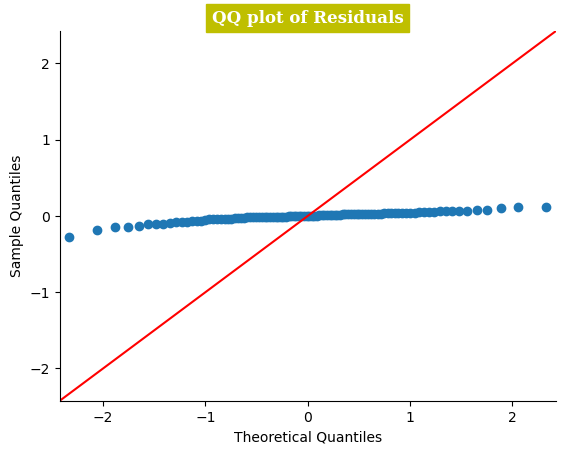

In [70]:
# Q-Q plot
import statsmodels.stats.api as sms
import statsmodels.api as sm
plt.figure(figsize=(15,5))
sm.qqplot(r_test, line = "45")
plt.title("QQ plot of Residuals", fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
sns.despine()
#plt.ylim(-0.15, 0.25)
plt.show()

**d. No heteroscedascity**

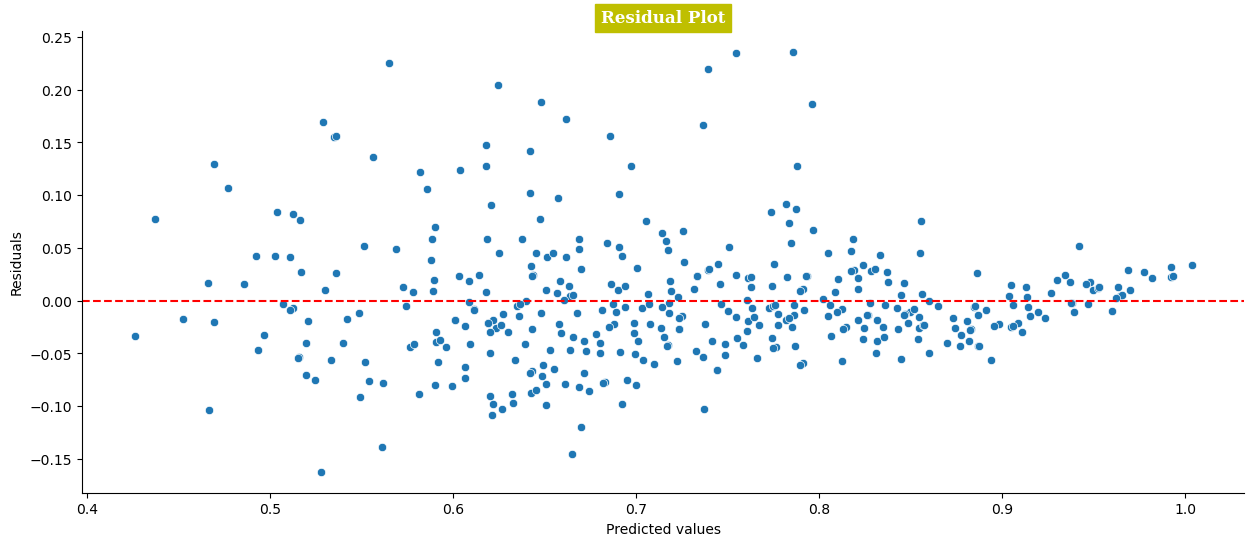

In [71]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_ptrain, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot',fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
sns.despine()
plt.show()

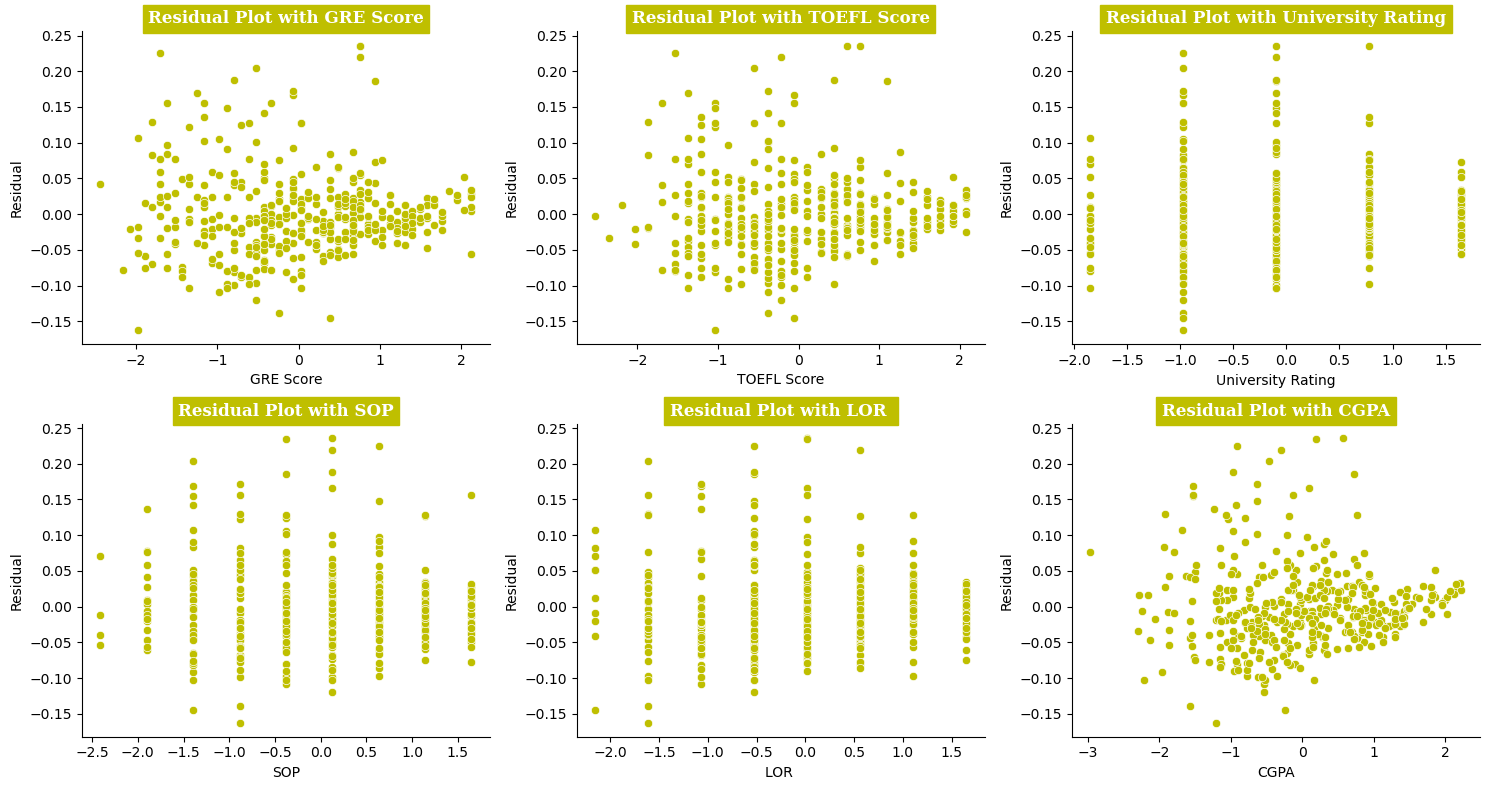

In [72]:
# scatterplot of residuals with each independent variable to chekc for Homoscedescity

plt.figure(figsize=(15,8))
i=1
for col in X_train.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x = X_train[col], y=residuals, color="y")
    plt.title(f"Residual Plot with {col}", fontsize=12, fontfamily="serif", fontweight="bold", backgroundcolor="y", color="w")
    plt.xlabel(col)
    plt.ylabel("Residual")
    i+=1

plt.tight_layout()
sns.despine()
plt.show()

In [73]:
# breusch Pagan for Homoscedasticity
# H0: Homoscedasticity is present
# Ha: Heteroscedasticity is present
# aplha = 0.05
ols_model = results
import statsmodels.stats.api as sms
bp_test = pd.DataFrame(sms.het_breuschpagan(residuals, ols_model.model.exog), columns=["value"], index= ["Lagrange multiplier stattitic", 
                                                                                                         "p_value", "f_value", "f p_value"])
bp_test

,value
Lagrange multiplier stattitic,25.155866
p_value,0.000712
f_value,3.758171
f p_value,0.000588


Insights: 

1. Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that Homoscedasticity is met.
2. Since the p-value is much lower than the alpha value, we can Reject the null hypothesis and conclude that Heteroscedasticity is present
3. Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.
4. This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.
5. It's important to consider alternative modeling approaches or corrective measures to address this issue.


**8.Lasso and Ridge Regularization - L1 & L2**

In [74]:
# importing Lasso, Ridge and ElasticNet regularization from sklearn
from sklearn.linear_model import Lasso, Ridge, ElasticNet
model_lasso = Lasso(alpha=0.45)              # constructing the lasso regression model
model_lasso.fit(X_train, y_train)            # fitting the lasso regression model

Lasso(alpha=0.45)

In [75]:
model_ridge = Ridge()                   # constructing the ridge regression model
model_ridge.fit(X_train, y_train)       # fitting the ridge regression model

Ridge()

In [76]:
y_pred_trainlasso = model_lasso.predict(X_train) # predicting the training target variable from lasso model
y_pred_testlasso = model_lasso.predict(X_test)   # predicting the testing target variable from ridge model

In [77]:
y_pred_trainridge = model_ridge.predict(X_train) # predicting the testing target variable from ridge model
y_pred_testridge = model_ridge.predict(X_test)   # predicting the testing target variable from ridge model



In [78]:
df1.columns[:-1]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [79]:
# constructing the datafrme for features' weights from lasso model
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df1.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.724175


In [80]:
# constructing the datafrme for features' weights from ridge model
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df1.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026789,0.018355,0.003046,0.001937,0.015893,0.067011,0.011949,0.724175


In [81]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train, y_ptrain, model)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test, y_ptest, model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train, y_pred_trainridge, model_ridge)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test, y_pred_testridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train, y_pred_trainlasso, model_lasso)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test, y_pred_testlasso, model_lasso)
print('---'*25)

Linear Regression Training Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.82
*************************

Linear Regression Test Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.82
*************************


Ridge Regression Test Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.82
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE:0.02
MAE:0.11
RMSE:0.14
R2 Score:0.0
Adjusted Score:-0.02
*************************


Lasso Regression Test Accuracy

MSE:0.02
MAE:0.12
RMSE:0.14
R2 Score:-0.01
Adjusted Score:-0.09
---------------------------------------------------------------------------


In [82]:
model_lasso.coef_.shape

(7,)

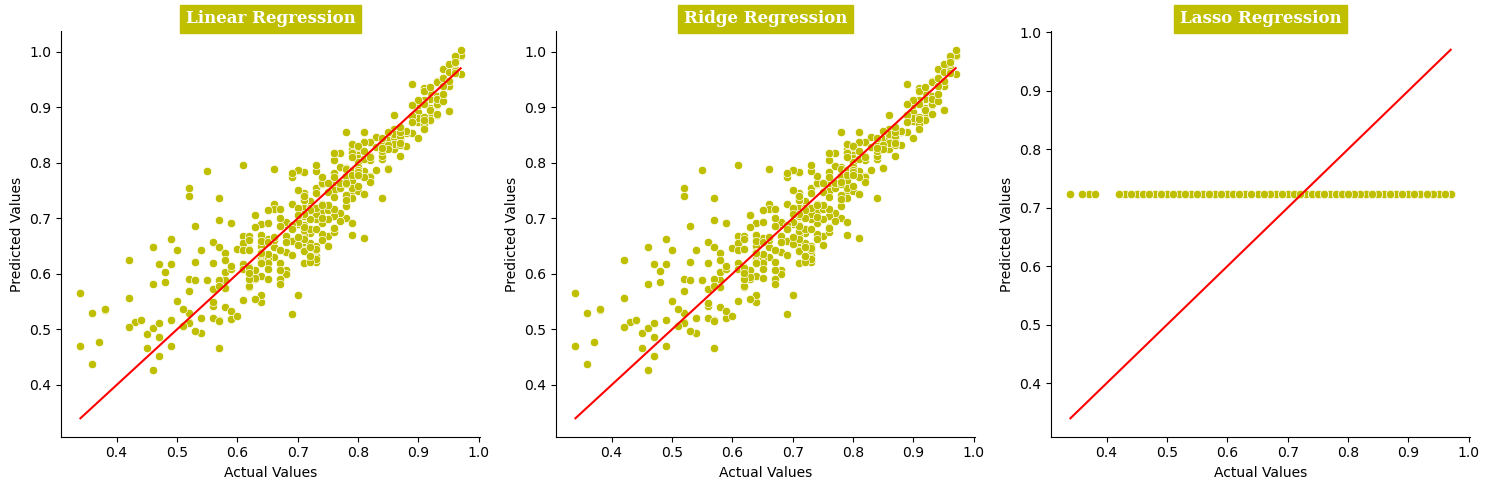

In [83]:
actual_values = y_train.reshape((-1,))
predicted_values = [y_ptrain.reshape((-1,)), y_pred_trainridge.reshape((-1,)), y_pred_trainlasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='y')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='y',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

**9.Elastic Net**

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define grid search parameters
param_grid = {'alpha': alpha_range}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

In [85]:
best_alpha

0.001

In [86]:
ElasticNet_model = ElasticNet(alpha=best_alpha)
ElasticNet_model.fit(X_train , y_train)

ElasticNet(alpha=0.001)

In [87]:
train_R2 = ElasticNet_model.score(X_train,y_train)
test_R2 = ElasticNet_model.score(X_test,y_test)
train_R2 , test_R2

(0.8210455718838163, 0.8190324184460966)

In [88]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df1.columns[:-1])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026658,0.018098,0.002865,0.00172,0.015633,0.067547,0.011654,0.724175


In [89]:
y_pred_train_en = ElasticNet_model.predict(X_train)
y_pred_test_en = ElasticNet_model.predict(X_test)

In [90]:
print('ElasticNet Regression Training Accuracy\n')
model_evaluation(y_train, y_pred_train_en, ElasticNet_model)
print('*'*25)
print('\nElasticNet Regression Test Accuracy\n')
model_evaluation(y_test, y_pred_test_en, ElasticNet_model)
print('---'*25)

ElasticNet Regression Training Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.82
*************************

ElasticNet Regression Test Accuracy

MSE:0.0
MAE:0.04
RMSE:0.06
R2 Score:0.82
Adjusted Score:0.81
---------------------------------------------------------------------------


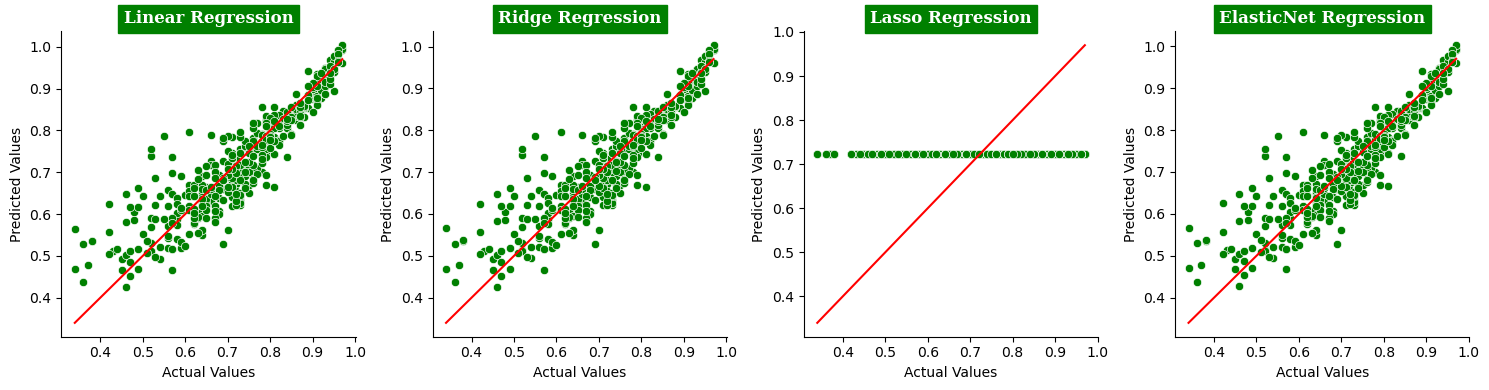

In [91]:
actual_values = y_train.reshape((-1,))
predicted_values = [y_ptrain.reshape((-1,)), y_pred_trainridge.reshape((-1,)),
                    y_pred_trainlasso.reshape((-1,)),y_pred_train_en.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

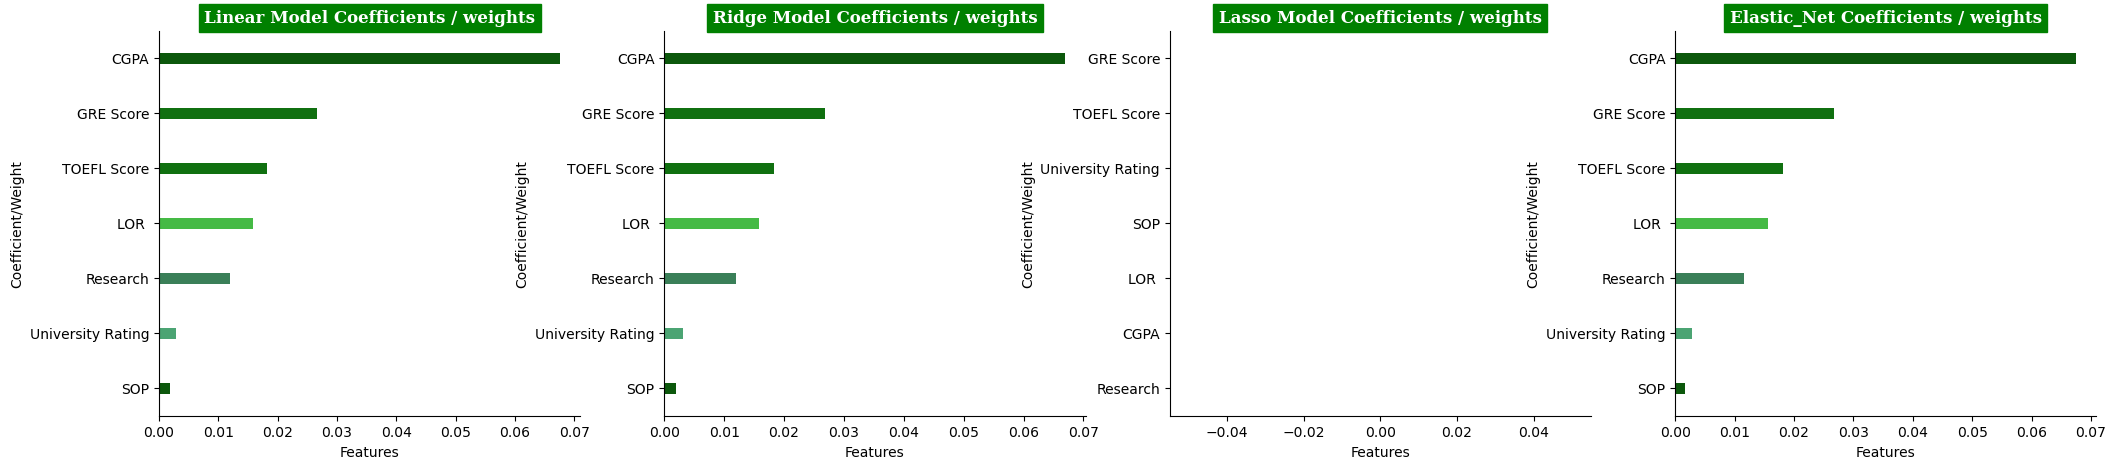

In [92]:
model_major_weights = {"Linear Model":coef,
                       "Ridge Model":ridge_model_weights,
                       "Lasso Model":lasso_model_weights,
                       "Elastic_Net":en_model_weights}
# excluding w0-intercept
plt.figure(figsize=(25,5))
i=1
for model,data in model_major_weights.items():
    model_weights_data = data.melt()
    plt.subplot(1,4,i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
                y='variable', x='value',width=0.2,palette=['darkgreen','g','green','limegreen','seagreen','mediumseagreen'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient/Weight')
    plt.title(f'{model} Coefficients / weights',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
sns.despine()
plt.show()

Final Insights:

1. **R² Score without Regularization:** The model achieves an R² score of **0.81** on unseen data without any regularization. This indicates a decent fit but leaves some room for improvement.

2. **R² Score with Ridge and Elastic Net Regularization:** When using Ridge and Elastic Net regularization, the R² score improves to **0.82** on unseen data. This slight improvement suggests that regularization is helping to prevent overfitting while still capturing important features.

3. **Performance with Lasso Regularization:** The model performs poorly with Lasso Regularization, as it drives the weights of all features to **zero**. This suggests that Lasso may be too aggressive in shrinking feature coefficients to zero, which negatively affects performance.

4. **Most Important Features:** The key features driving the model's performance, based on their weights, are:

- CGPA
- GRE Score
- TOEFL Score
- LOR (Letter of Recommendation Strength)
- Research Experience
- University Rating
- SOP (Statement of Purpose)
  
These features seem to be the most predictive for the target outcome, contributing significantly to the model's predictive power.






